In [12]:
# Initial imports
import os
import pandas as pd
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
%matplotlib inline


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GuilleMGN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Fetch the Oil news articles
#Crude_news_articles = news_api.get_everything(q = "Crude" and "Canada", language = "en")
from pathlib import Path
file_path = Path('headlines/combined_csv.csv')
Crude_news_articles = pd.read_csv(file_path)


In [4]:
Crude_news_article = Crude_news_articles.set_index('date')
Crude_news_article.head()

,headline,doc_type,material_type,section,keywords,compound,positive,neutral,negative
date,,,,,,,,,
2000-10-01,Harvard's Black Alumni,article,Letter,NaN,"['Blacks', 'Black People']",NaN,NaN,NaN,NaN
2000-10-01,GOING OUT,article,Schedule,NaN,[],NaN,NaN,NaN,NaN
2000-10-01,"The Selling of New Jersey, and Its Difficulties",article,News,NaN,"['International Trade and World Market', 'Trad...",NaN,NaN,NaN,NaN
2000-10-01,The Maximum Security Adolescent,article,Letter,NaN,"['Prisons and Prisoners', 'Children and Youth']",NaN,NaN,NaN,NaN
2000-10-01,"Paid Notice: Deaths MEEHAN, JANE C.",article,Paid Death Notice,NaN,[],NaN,NaN,NaN,NaN


In [5]:
crude_news_article = Crude_news_article[Crude_news_article["keywords"].str.contains("Petroleum")==True]
pd.set_option('display.max_colwidth', None)
crude_news_article.head()

,headline,doc_type,material_type,section,keywords,compound,positive,neutral,negative
date,,,,,,,,,
2000-10-01,Surcharge on Fuel Raises Air Fares in U.S.,article,News,NaN,"['AIRLINES AND AIRPLANES', 'Oil (Petroleum) and Gasoline', 'Prices (Fares, Fees and Rates)']",NaN,NaN,NaN,NaN
2000-10-01,LAB ADMITS GAS FRAUD,article,News,NaN,"['Frauds and Swindling', 'Fines (Penalties)', 'Oil (Petroleum) and Gasoline']",NaN,NaN,NaN,NaN
2000-10-01,"The World; In Poor Countries, High Oil Prices Cost Even More",article,News,NaN,"['Oil (Petroleum) and Gasoline', 'Prices (Fares, Fees and Rates)', 'Third World and Developing Countries']",NaN,NaN,NaN,NaN
2000-10-01,Oil and Poker,article,Letter,NaN,"['STRATEGIC PETROLEUM RESERVE', 'Oil (Petroleum) and Gasoline', 'ELECTION ISSUES', 'Prices (Fares, Fees and Rates)']",NaN,NaN,NaN,NaN
2000-10-02,The Politics of Fuel,article,Editorial,NaN,"['International Trade and World Market', 'Surveys and Series', 'Editorials', 'Oil (Petroleum) and Gasoline', 'ELECTION ISSUES', 'Prices (Fares, Fees and Rates)', 'Presidential Election of 2000']",NaN,NaN,NaN,NaN


In [6]:
crude_news_article = crude_news_article.drop(['doc_type',"material_type",'section', 'keywords' ],axis=1)

In [7]:
# Sentiment score columns
crude_df = crude_news_article
crude_df["compound"] = 0.0000
crude_df["positive"] = 0.0000
crude_df["neutral"] = 0.0000
crude_df["negative"] = 0.0000
crude_df.head()


,headline,compound,positive,neutral,negative
date,,,,,
2000-10-01,Surcharge on Fuel Raises Air Fares in U.S.,0.0,0.0,0.0,0.0
2000-10-01,LAB ADMITS GAS FRAUD,0.0,0.0,0.0,0.0
2000-10-01,"The World; In Poor Countries, High Oil Prices Cost Even More",0.0,0.0,0.0,0.0
2000-10-01,Oil and Poker,0.0,0.0,0.0,0.0
2000-10-02,The Politics of Fuel,0.0,0.0,0.0,0.0


In [8]:
# Get sentiment for the text and the title
for index, row in crude_news_article.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["headline"])
        crude_df["compound"][index] = title_sentiment["compound"]
        crude_df["positive"][index] = title_sentiment["pos"]
        crude_df["neutral"][index] = title_sentiment["neu"]
        crude_df["negative"][index] = title_sentiment["neg"]
        
    except AttributeError:
        pass
 
crude_df.head()

C:\Users\GUILLE~1\AppData\Local\Temp/ipykernel_12732/876927470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crude_df["compound"][index] = title_sentiment["compound"]
C:\Users\GUILLE~1\AppData\Local\Temp/ipykernel_12732/876927470.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crude_df["positive"][index] = title_sentiment["pos"]
C:\Users\GUILLE~1\AppData\Local\Temp/ipykernel_12732/876927470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,headline,compound,positive,neutral,negative
date,,,,,
2000-10-01,Surcharge on Fuel Raises Air Fares in U.S.,0.0000,0.000,1.000,0.000
2000-10-01,LAB ADMITS GAS FRAUD,0.0000,0.000,1.000,0.000
2000-10-01,"The World; In Poor Countries, High Oil Prices Cost Even More",0.0000,0.000,1.000,0.000
2000-10-01,Oil and Poker,0.0000,0.000,1.000,0.000
2000-10-02,The Politics of Fuel,-0.3818,0.139,0.594,0.267


In [9]:
mean_crude_df = crude_df.groupby(crude_df.index).mean()

In [10]:
mean_crude_df.to_csv( "oil_sentiments.csv")

In [13]:
mean_crude_df.describe()

,compound,positive,neutral,negative
count,179.000000,179.000000,179.000000,179.000000
mean,-0.101658,0.057844,0.817335,0.124832
std,0.340041,0.106161,0.169368,0.156445
min,-0.880700,0.000000,0.329000,0.000000
25%,-0.361200,0.000000,0.700000,0.000000
50%,0.000000,0.000000,0.813000,0.000000
75%,0.000000,0.037500,1.000000,0.236500
max,0.659700,0.425000,1.000000,0.671000


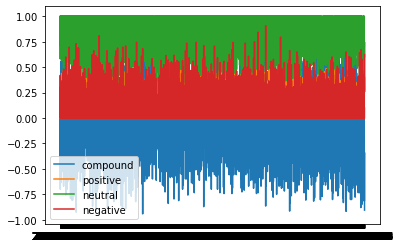

In [22]:
crude_plot = crude_df.reset_index()
plt.plot(crude_plot["date"], crude_plot["compound"], label="compound")
plt.plot(crude_plot["date"], crude_plot["positive"], label="positive")
plt.plot(crude_plot["date"], crude_plot["neutral"], label="neutral")
plt.plot(crude_plot["date"], crude_plot["negative"], label="negative")
plt.legend()
plt.show()